# Movie Recommender Systems

In [1]:
pip install ipython


In [ ]:
# import library
import pandas as pd
import numpy as np

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#for jupyter notebook widgets
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

from IPython.display import display


# supress warnings
import warnings 
warnings.filterwarnings('ignore')


In [4]:
# setting up the chart size and background
plt.rcParams['figure.figsize'] = (16,5)
plt.style.use('fivethirtyeight')

In [5]:
data = pd.read_csv("movie_metadata.csv")
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [6]:
data.shape

(5043, 28)

In [7]:
# Check the details about columns in the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [8]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [9]:
# Remove unnecassary columns from the dataset
data = data.drop(['color', 'director_facebook_likes', 'actor_3_facebook_likes','actor_1_facebook_likes',
                  'cast_total_facebook_likes','facenumber_in_poster','plot_keywords','actor_2_facebook_likes','country',
                  'content_rating','aspect_ratio','movie_imdb_link'], axis = 1)

In [10]:
data.columns

Index(['director_name', 'num_critic_for_reviews', 'duration', 'actor_2_name',
       'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users',
       'actor_3_name', 'num_user_for_reviews', 'language', 'budget',
       'title_year', 'imdb_score', 'movie_facebook_likes'],
      dtype='object')

# Missing value imputation

In [11]:
data.isnull().sum()

director_name             104
num_critic_for_reviews     50
duration                   15
actor_2_name               13
gross                     884
genres                      0
actor_1_name                7
movie_title                 0
num_voted_users             0
actor_3_name               23
num_user_for_reviews       21
language                   12
budget                    492
title_year                108
imdb_score                  0
movie_facebook_likes        0
dtype: int64

In [12]:
data = data[~np.isnan(data['gross'])]
data = data[~np.isnan(data['budget'])]

In [13]:
data.isnull().sum()

director_name              0
num_critic_for_reviews     1
duration                   1
actor_2_name               5
gross                      0
genres                     0
actor_1_name               3
movie_title                0
num_voted_users            0
actor_3_name              10
num_user_for_reviews       0
language                   3
budget                     0
title_year                 0
imdb_score                 0
movie_facebook_likes       0
dtype: int64

In [14]:
# Delete those record where we have more than or equal to 2 missing value
data = data[data.isnull().sum(axis = 1)<=2]
data.isnull().sum()

director_name             0
num_critic_for_reviews    1
duration                  1
actor_2_name              2
gross                     0
genres                    0
actor_1_name              0
movie_title               0
num_voted_users           0
actor_3_name              7
num_user_for_reviews      0
language                  3
budget                    0
title_year                0
imdb_score                0
movie_facebook_likes      0
dtype: int64

In [15]:
#  impute the missing values
data['num_critic_for_reviews'].fillna(data['num_critic_for_reviews'].mean(), inplace = True)

data['duration'].fillna(data['duration'].mean(), inplace = True)

# using mode for categorical column
data['language'].fillna(data['language'].mode()[0], inplace = True)

# replace missing actor name with unknown
data['actor_2_name'].fillna('unknown Actor', inplace = True)
data['actor_3_name'].fillna('unknown Actor', inplace = True)

data.isnull().sum()

director_name             0
num_critic_for_reviews    0
duration                  0
actor_2_name              0
gross                     0
genres                    0
actor_1_name              0
movie_title               0
num_voted_users           0
actor_3_name              0
num_user_for_reviews      0
language                  0
budget                    0
title_year                0
imdb_score                0
movie_facebook_likes      0
dtype: int64

# Feature engineering

In [16]:
# convert gross and budget to the movie from dollars to million dollars
data['gross'] = data['gross']/1000000
data['budget'] = data['budget']/1000000

# create profit colum using budget and gross
data['profit'] = data['gross'] - data['budget']

In [17]:
data.head()

,director_name,num_critic_for_reviews,duration,actor_2_name,gross,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,178.0,Joel David Moore,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,Wes Studi,3054.0,English,237.0,2009.0,7.9,33000,523.505847
1,Gore Verbinski,302.0,169.0,Orlando Bloom,309.404152,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,Jack Davenport,1238.0,English,300.0,2007.0,7.1,0,9.404152
2,Sam Mendes,602.0,148.0,Rory Kinnear,200.074175,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,Stephanie Sigman,994.0,English,245.0,2015.0,6.8,85000,-44.925825
3,Christopher Nolan,813.0,164.0,Christian Bale,448.130642,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,Joseph Gordon-Levitt,2701.0,English,250.0,2012.0,8.5,164000,198.130642
5,Andrew Stanton,462.0,132.0,Samantha Morton,73.058679,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,Polly Walker,738.0,English,263.7,2012.0,6.6,24000,-190.641321


In [18]:
# check the top 10 profitable movie
data[['profit','movie_title']].sort_values(by= 'profit', ascending = False).head(10)

,profit,movie_title
0,523.505847,Avatar
29,502.177271,Jurassic World
26,458.672302,Titanic
3024,449.935665,Star Wars: Episode IV - A New Hope
3080,424.449459,E.T. the Extra-Terrestrial
794,403.279547,The Avengers
17,403.279547,The Avengers
509,377.783777,The Lion King
240,359.544677,Star Wars: Episode I - The Phantom Menace
66,348.316061,The Dark Knight


In [19]:
# print number of rows before removing duplicates
print('No.of rows before removing duplicates:',data.shape[0])

# remove all the duplicates from data
data.drop_duplicates(subset = None, keep='first', inplace = True)

# print number of rows after removing duplicates from data
print("No.of rows after removing duplicates:", data.shape[0])

No.of rows before removing duplicates: 3888
No.of rows after removing duplicates: 3853


In [20]:
# lets check the top 10 profitable movie
data[['profit','movie_title']].sort_values(by= 'profit', ascending = False).head(10)

,profit,movie_title
0,523.505847,Avatar
29,502.177271,Jurassic World
26,458.672302,Titanic
3024,449.935665,Star Wars: Episode IV - A New Hope
3080,424.449459,E.T. the Extra-Terrestrial
17,403.279547,The Avengers
509,377.783777,The Lion King
240,359.544677,Star Wars: Episode I - The Phantom Menace
66,348.316061,The Dark Knight
439,329.999255,The Hunger Games


In [21]:
data['language'].value_counts()

English       3673
French          37
Spanish         26
Mandarin        14
German          13
Japanese        12
Hindi           10
Cantonese        8
Italian          7
Portuguese       5
Korean           5
Norwegian        4
Dutch            3
Persian          3
Thai             3
Hebrew           3
Danish           3
Aboriginal       2
Dari             2
Indonesian       2
Russian          1
Romanian         1
Vietnamese       1
Arabic           1
Dzongkha         1
Zulu             1
None             1
Aramaic          1
Czech            1
Telugu           1
Icelandic        1
Filipino         1
Hungarian        1
Maya             1
Bosnian          1
Mongolian        1
Kazakh           1
Swedish          1
Name: language, dtype: int64

In [22]:
# make only two language
def language(x):
    if x == 'English':
        return "English"
    else:
        return "Foreign"
# lets apply the function on the language column
data['language'] = data['language'].apply(language)
    
    

In [23]:
# check the value again
data['language'].value_counts()

English    3673
Foreign     180
Name: language, dtype: int64

In [24]:
data['duration'].value_counts()

101.0    113
100.0    109
98.0     105
95.0      97
99.0      97
        ... 
196.0      1
63.0       1
185.0      1
219.0      1
65.0       1
Name: duration, Length: 157, dtype: int64

In [25]:
def duration(x):
    if x <= 120:
        return 'short'
    else:
        return "long"
    
data['duration'] = data['duration'].apply(duration)    

data['duration'].value_counts() 

short    2936
long      917
Name: duration, dtype: int64

#Extracting the movies genres

In [26]:
data['genres'].value_counts()

Drama                                     153
Comedy|Drama|Romance                      151
Comedy|Drama                              147
Comedy                                    145
Comedy|Romance                            135
                                         ... 
Action|Crime|Drama|Thriller|War             1
Adventure|Comedy|Family|Musical             1
Action|Adventure|Family|Fantasy|Sci-Fi      1
Action|Drama|Mystery|Thriller|War           1
Comedy|Crime|Horror                         1
Name: genres, Length: 762, dtype: int64

In [27]:
data['genres'].str.split('|')[0]

['Action', 'Adventure', 'Fantasy', 'Sci-Fi']

In [28]:
# a movie have so many genres so lets keep only four 

data['Moviegenres'] = data['genres'].str.split('|')
data['genre1'] = data['Moviegenres'].apply(lambda x: x[0])
# some of the movie have only one genres in such case again assign the same genre to genre2 as well
data['genre2'] = data['Moviegenres'].apply(lambda x: x[1] if len(x) > 1 else x[0])
data['genre3'] = data['Moviegenres'].apply(lambda x: x[2] if len(x) > 2 else x[0])
data['genre4'] = data['Moviegenres'].apply(lambda x: x[3] if len(x) > 3 else x[0])

# lets check the head of the data
data[['genres','genre1','genre2','genre3','genre4']].head()

,genres,genre1,genre2,genre3,genre4
0,Action|Adventure|Fantasy|Sci-Fi,Action,Adventure,Fantasy,Sci-Fi
1,Action|Adventure|Fantasy,Action,Adventure,Fantasy,Action
2,Action|Adventure|Thriller,Action,Adventure,Thriller,Action
3,Action|Thriller,Action,Thriller,Action,Action
5,Action|Adventure|Sci-Fi,Action,Adventure,Sci-Fi,Action


# Top 10 most popular movies on social media

In [29]:
# calculate the social media popularity of a movie
# To calculate popularity of a movie we can aggregate no.of voted users no.of users for reviewed and facebook likes
data['social_media_popularity'] = ((data['num_user_for_reviews']/data['num_voted_users'])* (data['movie_facebook_likes']))/1000000

In [30]:
# check the top 10 most popular movies on social media
x = data[['movie_title','social_media_popularity']].sort_values(by="social_media_popularity", ascending = False).head(10).reset_index()
print(x)



   index                          movie_title  social_media_popularity
0     10  Batman v Superman: Dawn of Justice                  0.001600
1    150                        Ghostbusters                  0.001076
2   1582                        Ghostbusters                  0.001076
3     96                        Interstellar                  0.001025
4   3015               10 Days in a Madhouse                  0.000828
5    945                      Into the Woods                  0.000693
6     73                       Suicide Squad                  0.000653
7   1190                Fifty Shades of Grey                  0.000624
8    108                            Warcraft                  0.000623
9     92        Independence Day: Resurgence                  0.000599


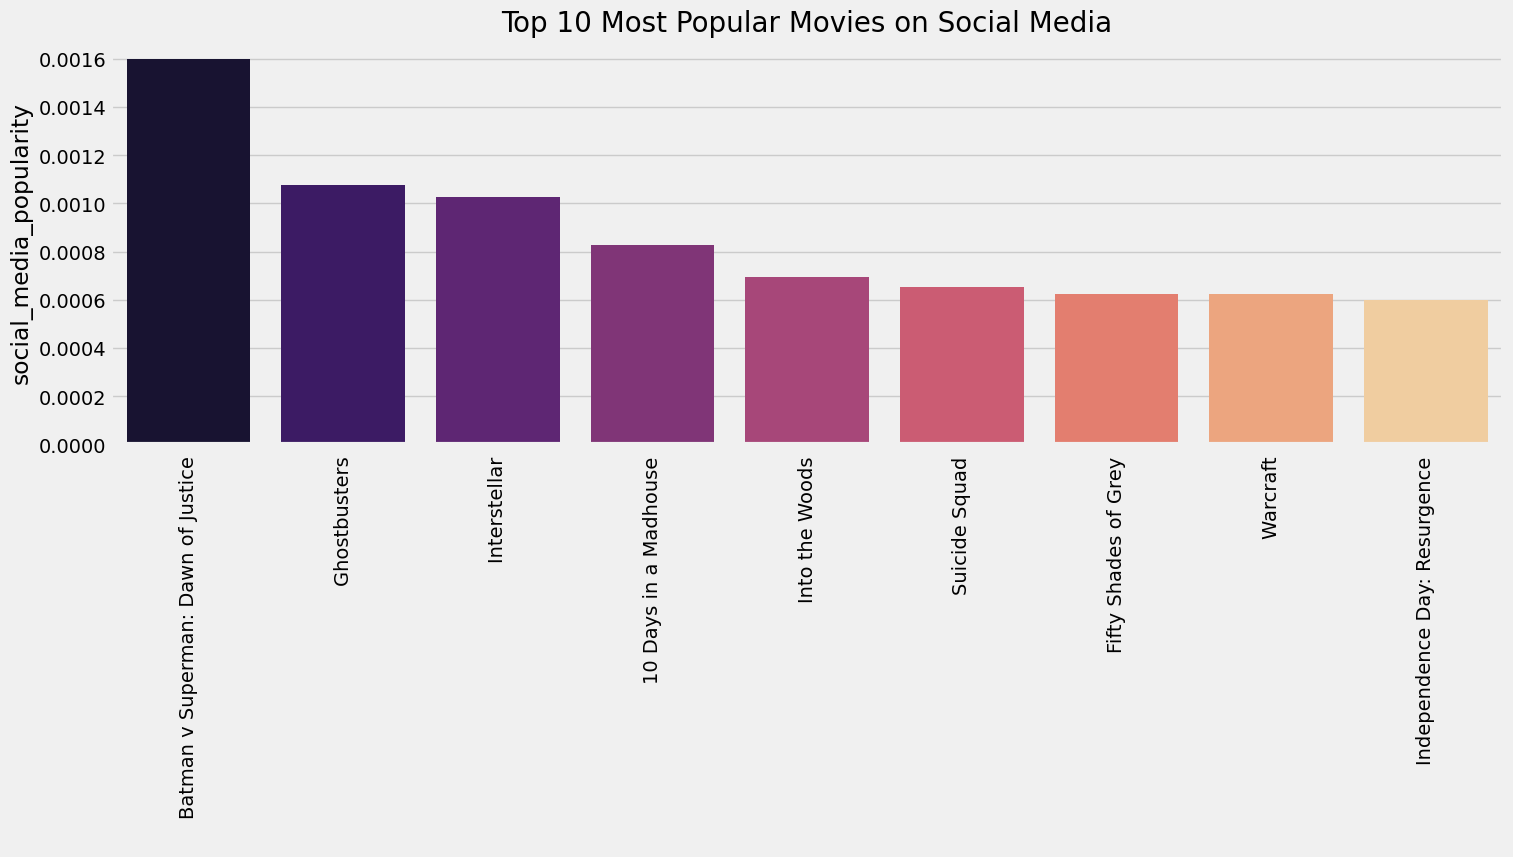

In [31]:
sns.barplot(x['movie_title'], x['social_media_popularity'], palette = 'magma')
plt.title('Top 10 Most Popular Movies on Social Media', fontsize = 20)
plt.xticks(rotation = 90, fontsize = 14)
plt.xlabel(' ')
plt.show()

# Analyzing which genre is most bankable

AttributeError: Line2D.set() got an unexpected keyword argument 'colors'

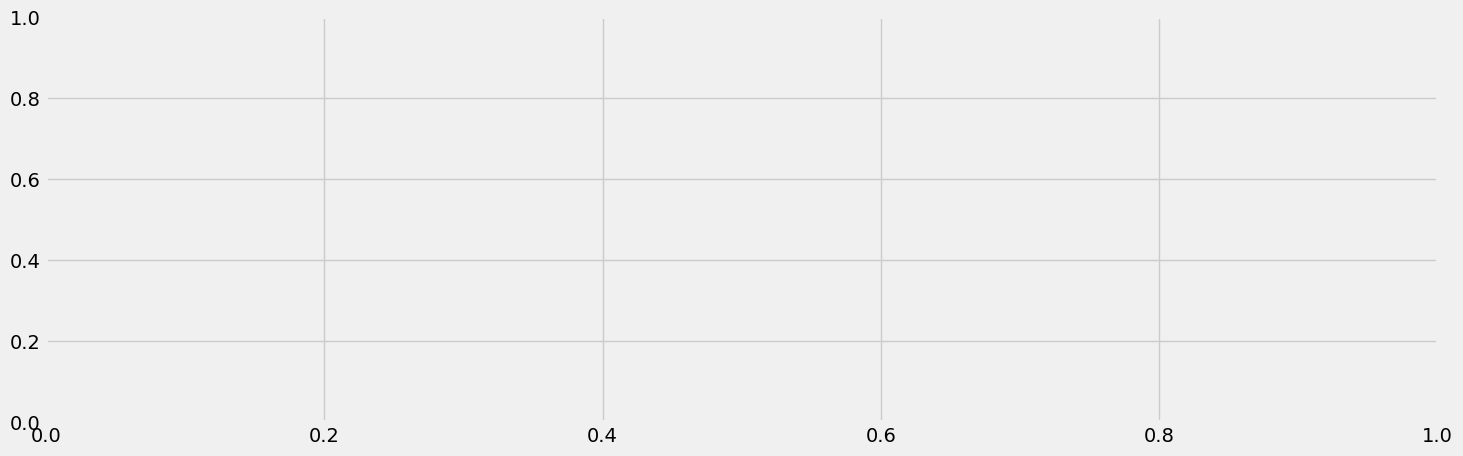

In [32]:
# compare the gross with genre
# first group the genre and get max min and avg gross of the movies of that genre
display(data[['genre1','gross']].groupby(['genre1']).agg(['max','mean','min']).style.background_gradient(cmap = 'Wistia'))

# plot these values using lineplot
# plot these values using lineplot
data[['genre1','gross',]].groupby(['genre1']).agg(['max','mean','min']).plot(kind = 'line', colors = ['red','black','blue'])
plt.title('Which Genre is Most Bankable?', fontsize = 20)
plt.xticks(np.arange(17),['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'Western'], rotation = 90, fontsize = 15)
plt.ylabel('Gross', fontsize = 15)
plt.xlabel(' ',)
plt.show()

print('The Most Profitable Movie from each Genre')
display(data.loc[data.groupby(data['Genre1'])['Profit'].idxmax()][['Genre1',
                                    'movie_title','gross']].style.background_gradient(cmap = 'copper'))

In [ ]:
#  compare the Gross with Genres

# first group the genres and get max, min, and avg gross of the movies of that genre.)
display(data[['genre1','gross',]].groupby(['genre1']).agg(['max','mean','min']).style.background_gradient(cmap = 'Wistia'))

# lets plot these values using lineplot
data[['genre1','gross',]].groupby(['genre1']).agg(['max','mean','min']).plot(kind = 'line', color = ['red','black','blue'])
plt.title('Which Genre is Most Bankable?', fontsize = 20)
plt.xticks(np.arange(17), ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'Western'], rotation = 90, fontsize = 15)
plt.ylabel('Gross', fontsize = 15)
plt.xlabel(' ',)
plt.show()

print('The Most Profitable Movie from each Genre')
display(data.loc[data.groupby(data['genre1'])['profit'].idxmax()][['genre1',
                                    'movie_title','gross']].style.background_gradient(cmap = 'copper'))

# loss and profit analysis on english and foreign movies

In [33]:
data['title_year'] = data['title_year'].astype('int')

In [34]:
# print most profitable year in box office
display(data[['title_year', 'language', 'profit']].groupby(['language','title_year']).agg('sum').sort_values(by='profit',
                ascending = False).head(10).style.background_gradient(cmap = 'Greens'))

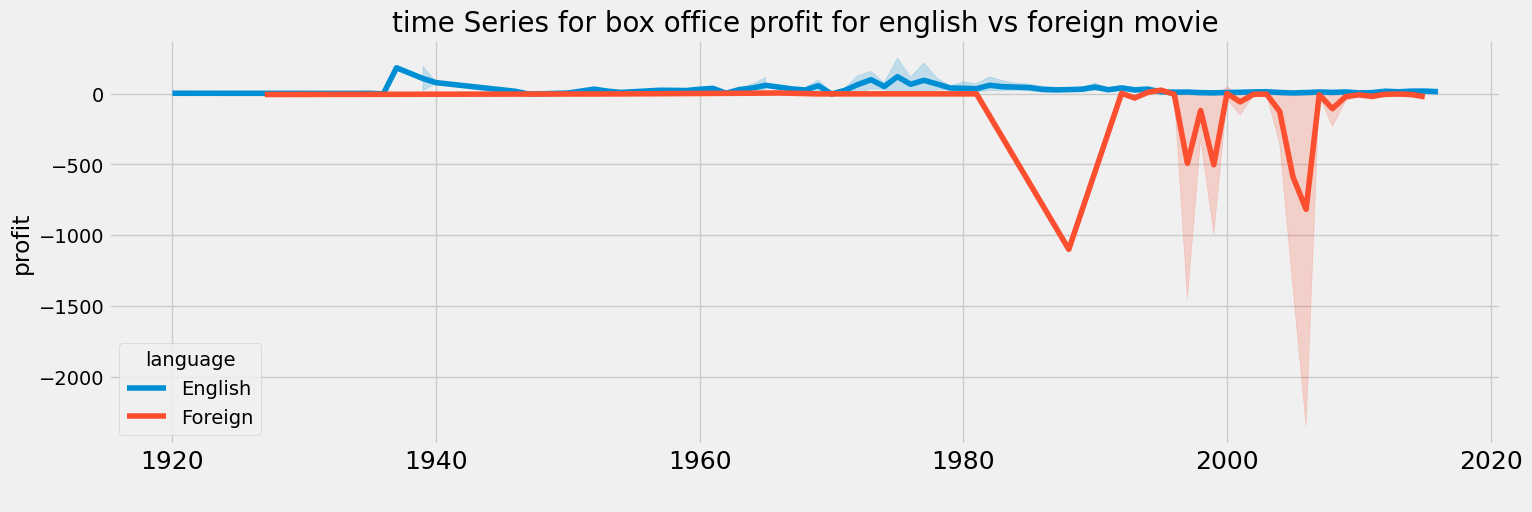

Movies that Made Huge Losses


,movie_title,language,profit
2323,Princess Mononoke,Foreign,-2397.701809
2334,Steamboy,Foreign,-2127.109510
2988,The Host,Foreign,-12213.298588
3005,Fateless,Foreign,-2499.804112
3859,Lady Vengeance,Foreign,-4199.788333


In [35]:
#  plot 
sns.lineplot(data['title_year'], data['profit'], hue =data['language'])
plt.title("time Series for box office profit for english vs foreign movie", fontsize =20)
plt.xticks(fontsize =18)
plt.xlabel(" ")
plt.show()

print("Movies that Made Huge Losses")
display(data[data['profit'] < -2000][['movie_title',
                        'language','profit']].style.background_gradient(cmap = 'Reds'))

# Gross comparison of long and short movies

In [36]:
display(data[data['duration'] == 'long'][['movie_title','duration','gross','profit']].sort_values(by ='profit', ascending = False).head(5).style.background_gradient(cmap = 'spring'))
display(data[data['duration'] == 'short'][['movie_title','duration','gross','profit']].sort_values(by ='profit', ascending = False).head(5).style.background_gradient(cmap = 'spring'))

,movie_title,duration,gross,profit
0,Avatar,long,760.505847,523.505847
29,Jurassic World,long,652.177271,502.177271
26,Titanic,long,658.672302,458.672302
3024,Star Wars: Episode IV - A New Hope,long,460.935665,449.935665
17,The Avengers,long,623.279547,403.279547


,movie_title,duration,gross,profit
3080,E.T. the Extra-Terrestrial,short,434.949459,424.449459
509,The Lion King,short,422.783777,377.783777
812,Deadpool,short,363.024263,305.024263
521,Despicable Me 2,short,368.049635,292.049635
338,Finding Nemo,short,380.838870,286.838870


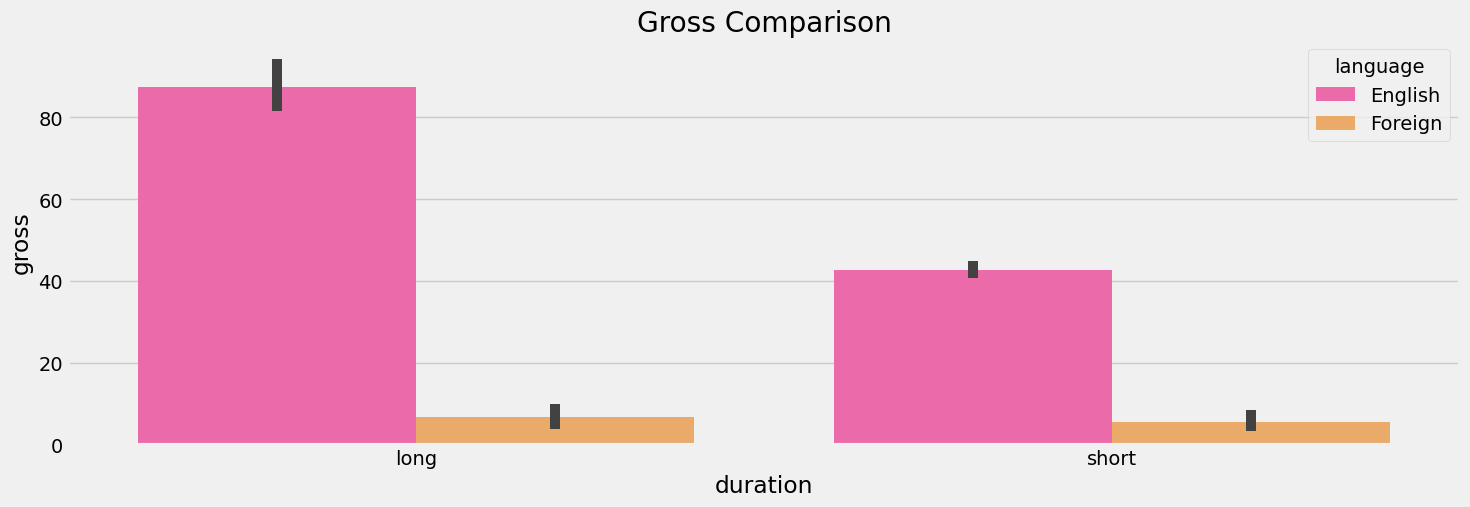

In [37]:
sns.barplot(data['duration'], data['gross'], hue = data['language'], palette = 'spring')
plt.title("Gross Comparison")
plt.show()

# Associated between IMDB rating and duration

In [38]:
#  get started and find out the average imdb rating of long and short duration movies by applying filtering conditions on the set
print("Average IMDB Score for Long Duration Movies is {0:.2f}".format(data[data['duration'] == 'Long']['imdb_score'].mean()))
print("Average IMDB Score for Short Duration Movies is {0:.2f}".format(data[data['duration'] == 'Short']['imdb_score'].mean()))

Average IMDB Score for Long Duration Movies is nan
Average IMDB Score for Short Duration Movies is nan


In [39]:
data.columns

Index(['director_name', 'num_critic_for_reviews', 'duration', 'actor_2_name',
       'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users',
       'actor_3_name', 'num_user_for_reviews', 'language', 'budget',
       'title_year', 'imdb_score', 'movie_facebook_likes', 'profit',
       'Moviegenres', 'genre1', 'genre2', 'genre3', 'genre4',
       'social_media_popularity'],
      dtype='object')

In [40]:
print("\n Highest rated long duration movies \n", data[data['duration'] == 'long'][['movie_title','imdb_score']].sort_values(by = 'imdb_score', ascending = False).head(10))
print("\n Highest rated short duration movies \n", data[data['duration'] == 'short'][['movie_title','imdb_score']].sort_values(by = 'imdb_score', ascending = False).head(10))


 Highest rated long duration movies 
                                             movie_title  imdb_score
1937                          The Shawshank Redemption          9.3
3466                                     The Godfather          9.2
66                                     The Dark Knight          9.0
2837                            The Godfather: Part II          9.0
3355                                      Pulp Fiction          8.9
339      The Lord of the Rings: The Return of the King          8.9
1874                                  Schindler's List          8.9
4498                    The Good, the Bad and the Ugly          8.9
97                                           Inception          8.8
270   The Lord of the Rings: The Fellowship of the R...         8.8

 Highest rated short duration movies 
                    movie_title  imdb_score
3592       The Usual Suspects          8.6
3175       American History X          8.6
4427             Modern Times          8.6
2

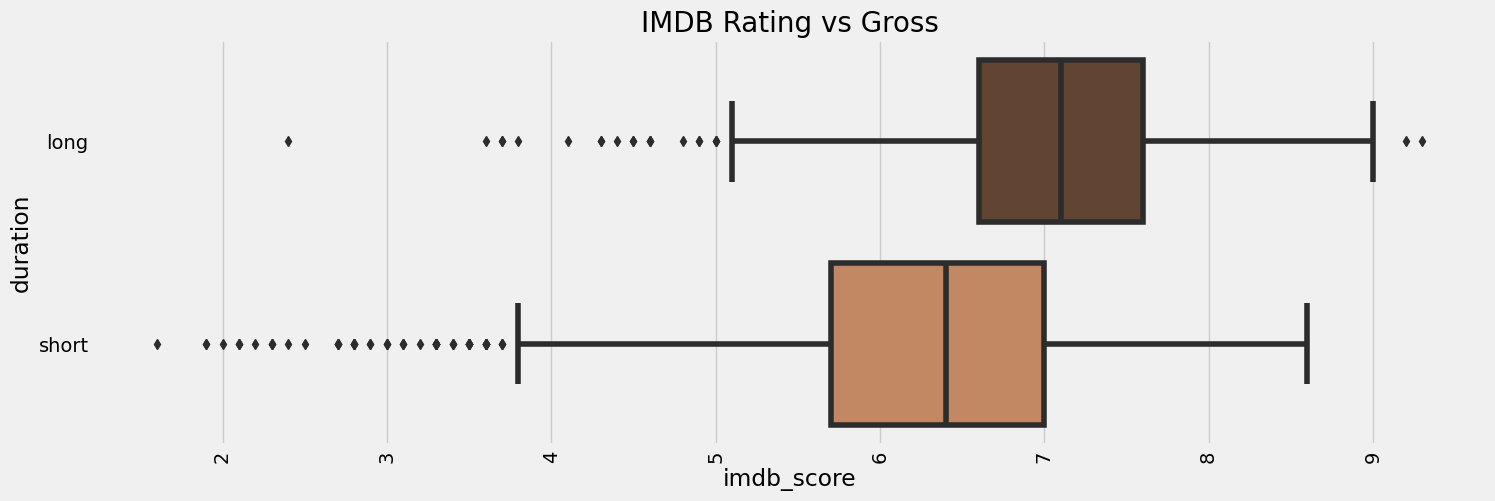

In [41]:
sns.boxplot(data['imdb_score'], data['duration'], palette ='copper')
plt.title('IMDB Rating vs Gross',fontsize =20)
plt.xticks(rotation = 90)
plt.show()

# comparing critically acclaimed actors

In [42]:
def query_actors(x):
    a = data[data['actor_1_name'] == x]
    b = data[data['actor_2_name'] == x]
    c = data[data['actor_3_name'] == x]
    x = a.append(b)
    y = x.append(c)
    
    y = y[['movie_title', 'budget', 'gross', 'title_year', 'genres', 'language', 'imdb_score']]
    return y

In [43]:
query_actors('Meryl Streep')

,movie_title,budget,gross,title_year,genres,language,imdb_score
410,It's Complicated,85.0,112.703470,2009,Comedy|Drama|Romance,English,6.6
1106,The River Wild,45.0,46.815748,1994,Action|Adventure|Crime|Thriller,English,6.3
1204,Julie & Julia,40.0,94.125426,2009,Biography|Drama|Romance,English,7.0
1408,The Devil Wears Prada,35.0,124.732962,2006,Comedy|Drama|Romance,English,6.8
1483,Lions for Lambs,35.0,14.998070,2007,Drama|Thriller|War,English,6.2
1575,Out of Africa,31.0,87.100000,1985,Biography|Drama|Romance,English,7.2
1618,Hope Springs,30.0,63.536011,2012,Comedy|Drama|Romance,English,6.3
1674,One True Thing,30.0,23.209440,1998,Drama,English,7.0
1925,The Hours,25.0,41.597830,2002,Drama|Romance,English,7.6
2781,The Iron Lady,13.0,29.959436,2011,Biography|Drama|History,English,6.4


# Making reports for actor

In [44]:
def actors_report(x):
    a = data[data['actor_1_name'] == x]
    b = data[data['actor_2_name'] == x]
    c = data[data['actor_3_name'] == x]
    x = a.append(b)
    y = x.append(c)
    print("Time:", y['title_year'].min(), y['title_year'].max())
    print("max gross:{0:.2f} millions".format(y['gross'].max()))
    print("Avg gross:{0:.2f} millions".format(y['gross'].mean()))
    print("Min gross:{0:.2f} millions".format(y['gross'].min()))
    print("Number of 100 Million Movies:",y[y["gross"]>100].shape[0])
    print("Avg IMDB Score: {0:.2f}".format(y['imdb_score'].mean()))
    print("Most Common Genres:\n",y['genre1'].value_counts().head())
actors_report('Meryl Streep')          
          

Time: 1985 2014
max gross:143.70 millions
Avg gross:55.23 millions
Min gross:9.66 millions
Number of 100 Million Movies: 4
Avg IMDB Score: 6.81
Most Common Genres:
 Drama        9
Comedy       7
Biography    3
Adventure    3
Action       1
Name: genre1, dtype: int64


In [45]:
#  compare Brad Pitt, Leonardo Caprio and Tom Cruise

def critically_acclaimed_actors(m):
    a = data[data['actor_1_name'] == m]
    b = data[data['actor_2_name'] == m]
    c = data[data['actor_3_name'] == m]
    x = a.append(b)
    y = x.append(c)
    return y['num_critic_for_reviews'].sum().astype('int')


print("Number of Critics Reviews for Brad Pitt")
display(critically_acclaimed_actors('Brad Pitt'))

print("Number of Critics Reviews for Leonardo DiCaprio")
display(critically_acclaimed_actors('Leonardo DiCaprio'))

print("Number of Critics Reviews for Tom Cruise")
display(critically_acclaimed_actors('Tom Cruise'))


Number of Critics Reviews for Brad Pitt


7814

Number of Critics Reviews for Leonardo DiCaprio


7014

Number of Critics Reviews for Tom Cruise


6740

# Top Movies based on gross and imdb

In [46]:
pd.set_option('display.max_rows', 3000)

@ interact
def show_movies_more_than(column = 'imdb_score', score = 9.0):
    x = data.loc[data[column] > score][['title_year', 'movie_title',
                                        'director_name', 
                                        'actor_1_name', 
                                        'actor_2_name',
                                        'actor_3_name', 
                                        'profit', 'imdb_score'
                                       ]]
    x = x.sort_values(by = 'imdb_score', ascending = False)
    x = x.drop_duplicates(keep = 'first')
    return x

interactive(children=(Text(value='imdb_score', description='column'), FloatSlider(value=9.0, description='scor…

In [47]:
pd.set_option('display.max_rows', 30000)

@ interact
def show_article_more_than(column = ['budget', 'gross'], x = 1000):
    return data.loc[data[column]>x][['movie_title','duration','gross','profit','imdb_score']]

interactive(children=(Dropdown(description='column', options=('budget', 'gross'), value='budget'), IntSlider(v…

# Recommending Movies based on laguage and actors

In [48]:
def recommend_lang(x):
    y = data[['language', 'movie_title', 'imdb_score']][data['language'] == x]
    y = y.sort_values(by = 'imdb_score', ascending = False)
    return y.head(15)

In [49]:
recommend_lang('Foreign')

,language,movie_title,imdb_score
4498,Foreign,"The Good, the Bad and the Ugly",8.9
4029,Foreign,City of God,8.7
4747,Foreign,Seven Samurai,8.7
2373,Foreign,Spirited Away,8.6
4921,Foreign,Children of Heaven,8.5
4259,Foreign,The Lives of Others,8.5
3931,Foreign,Samsara,8.5
4659,Foreign,A Separation,8.4
1329,Foreign,Baahubali: The Beginning,8.4
2970,Foreign,Das Boot,8.4


In [50]:
# based on actors
def recommend_movies_actors(x):
    a = data[['movie_title', 'imdb_score']][data['actor_1_name'] == x]
    b = data[['movie_title', 'imdb_score']][data['actor_2_name'] == x]
    c = data[['movie_title', 'imdb_score']][data['actor_3_name'] == x]
    
    a = a.append(b)
    a = a.append(c)
    a = a.sort_values(by = 'imdb_score', ascending = False)
    return a.head(15)

In [51]:
recommend_movies_actors('Tom Cruise')

,movie_title,imdb_score
1868,Rain Man,8.0
75,Edge of Tomorrow,7.9
284,Minority Report,7.7
158,The Last Samurai,7.7
736,Collateral,7.6
1524,A Few Good Men,7.6
940,Interview with the Vampire: The Vampire Chroni...,7.6
155,Mission: Impossible - Ghost Protocol,7.4
135,Mission: Impossible - Rogue Nation,7.4
671,Eyes Wide Shut,7.3


# Recommending similar genres and movies

In [52]:
data.to_csv('cleaned_data.csv', index=False)

In [56]:
# pip install mlxtend

In [54]:
from mlxtend.preprocessing import TransactionEncoder

In [55]:
x = data['genres'].str.split('|')
te = TransactionEncoder()
x = te.fit_transform(x)
x = pd.DataFrame(x, columns = te.columns_)

x.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,True,True,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
1,True,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [57]:
# lets convert this data into integer so that we can perform calculations
genres = x.astype('int')
genres.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [58]:
# now insert the movie_tite in the first column
genres.insert(0, 'movie_title', data['movie_title'])
genres.head()

,movie_title,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,Avatar,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,Pirates of the Caribbean: At World's End,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Spectre,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,The Dark Knight Rises,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,NaN,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [59]:
# lets set the these movie_title as index of the data
genres = genres.set_index('movie_title')
genres.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
Pirates of the Caribbean: At World's End,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Spectre,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
The Dark Knight Rises,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
NaN,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [68]:
# making A recommendation engine for getting similar genress.

def recommendation_genres(gen):
    gen = genres[gen]
    similar_genres = genres.corrwith(gen)
    similar_genres = similar_genres.sort_values(ascending = False)
    similar_genres = similar_genres.iloc[1:]
    return similar_genres.head(3)

In [69]:
# lets do the testing with action
recommendation_genres('Action')

Adventure    0.320532
Thriller     0.303708
Sci-Fi       0.295018
dtype: float64

# Recommending simialr movies


In [70]:
x = genres.transpose()
x.head()

movie_title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,NaN,John Carter,Spider-Man 3,Tangled,Avengers: Age of Ultron,Harry Potter and the Half-Blood Prince,...,Four Weddings and a Funeral,NaN,NaN,25th Hour,NaN,Bound,Requiem for a Dream,NaN,Tango,NaN
Action,1,1,1,1,1,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
Adventure,1,1,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Animation,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Biography,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Comedy,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [71]:
# Making A recommendation engine to getting similar movie
def recommendation_movies(movie):
    movie = x[movie + '\xa0']
    similar_movies = x.corrwith(movie)
    similar_movies = similar_movies.sort_values(ascending = False)
    similar_movies = similar_movies.iloc[1:]
    return similar_movies.head(10)

In [72]:
recommendation_movies("The Expendables")

movie_title
Captain Phillips                     1.0
Æon Flux                             1.0
Cloverfield                          1.0
Henry V                              1.0
Scooby-Doo 2: Monsters Unleashed     1.0
Predator                             1.0
Mr. Popper's Penguins                1.0
The Best of Me                       1.0
Amen.                                1.0
The Constant Gardener                1.0
dtype: float64